# The vanilla, minimal and dynamic NDF embeddings of nodes of a graph

In the following code, we otline how to generate the vanilla, minimal and dynamic NDF vetor representations of nodes of a graph.

### Tables 3 and 5 in the article is based on this notebook.

Examples 3.3 and 4.4

In [1]:
from mygraph import MyGraph
from helpers import *

In [2]:
# Building the graph 
myg = MyGraph()
edge_list = [("A", "B"), ("A", "C"), ("A", "J"), ("A", "Y"), ("A", "H"), ("Y", "I"), ("Y", "L"), ("Y", "H"),  
             ("I", "K"), ("B", "E"), ("B", "D"), ("D", "R"), ("D", "Q"), ("C", "F"), ("F", "E"), ("E", "D"), 
             ("L", "K"), ("K", "P"), ("H", "I"), ("H", "M"), ("M", "N"), ("N", "K") ]
myg.from_edge_list(edge_list)

In [3]:
# printing the adjacency list of the graph 
print_dict(myg.adj_list, keys_len=5)

A     {'B', 'H', 'J', 'C', 'Y'} 
B     {'A', 'E', 'D'} 
C     {'A', 'F'} 
J     {'A'} 
Y     {'I', 'L', 'A', 'H'} 
H     {'I', 'A', 'M', 'Y'} 
I     {'H', 'Y', 'K'} 
L     {'Y', 'K'} 
K     {'I', 'L', 'N', 'P'} 
E     {'B', 'D', 'F'} 
D     {'R', 'B', 'E', 'Q'} 
R     {'D'} 
Q     {'D'} 
F     {'E', 'C'} 
P     {'K'} 
M     {'N', 'H'} 
N     {'M', 'K'} 


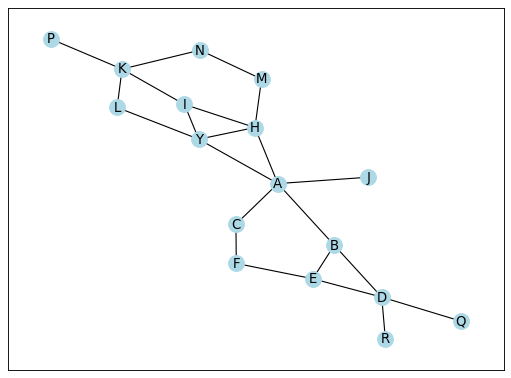

In [4]:
# drawing the graph
dg(myg)

In [5]:
# producing the degrees list of the graph
deg_list = myg.degrees_list()
deg_list

[1, 2, 3, 4, 5]

In [6]:
# producing the minimal NDF vectors as Example 3.3
sp_minimal = myg.starting_points(ratio = 0)  # the list of starting points for the miinimal intervals list
for node in myg.adj_list:
    print(f"{node}:  minimal (vanilla) ndf vector =  {myg.ndf(node, sp_minimal)}" )

A:  minimal (vanilla) ndf vector =  [1, 1, 1, 2, 0]
B:  minimal (vanilla) ndf vector =  [0, 0, 1, 1, 1]
C:  minimal (vanilla) ndf vector =  [0, 1, 0, 0, 1]
J:  minimal (vanilla) ndf vector =  [0, 0, 0, 0, 1]
Y:  minimal (vanilla) ndf vector =  [0, 1, 1, 1, 1]
H:  minimal (vanilla) ndf vector =  [0, 1, 1, 1, 1]
I:  minimal (vanilla) ndf vector =  [0, 0, 0, 3, 0]
L:  minimal (vanilla) ndf vector =  [0, 0, 0, 2, 0]
K:  minimal (vanilla) ndf vector =  [1, 2, 1, 0, 0]
E:  minimal (vanilla) ndf vector =  [0, 1, 1, 1, 0]
D:  minimal (vanilla) ndf vector =  [2, 0, 2, 0, 0]
R:  minimal (vanilla) ndf vector =  [0, 0, 0, 1, 0]
Q:  minimal (vanilla) ndf vector =  [0, 0, 0, 1, 0]
F:  minimal (vanilla) ndf vector =  [0, 1, 1, 0, 0]
P:  minimal (vanilla) ndf vector =  [0, 0, 0, 1, 0]
M:  minimal (vanilla) ndf vector =  [0, 1, 0, 1, 0]
N:  minimal (vanilla) ndf vector =  [0, 1, 0, 1, 0]


In [7]:
# The dynamic NDF vectors for parameters $s=2$, $m=3$ and $r=1.5$ as discribed in Example 4.4
sp_r1_5s2m3 = myg.starting_points(ratio = 1.5, max_length=3, starting_length=2)  # the list of starting points
for node in myg.adj_list:
    print(node, myg.ndf(node, sp_r1_5s2m3) )

A [2, 3]
B [0, 3]
C [1, 1]
J [0, 1]
Y [1, 3]
H [1, 3]
I [0, 3]
L [0, 2]
K [3, 1]
E [1, 2]
D [2, 2]
R [0, 1]
Q [0, 1]
F [1, 1]
P [0, 1]
M [1, 1]
N [1, 1]


In [8]:
# The dynamic NDF vectors for parameters $s=1$, $m=2$ and $r=2$ as discribed in Example 4.4
sp_r2s1m2 = myg.starting_points(ratio = 2, max_length=2, starting_length=1)  # the list of starting points
for node in myg.adj_list:
    print(node, myg.ndf(node, sp_r2s1m2) )

A [1, 2, 2]
B [0, 1, 2]
C [0, 1, 1]
J [0, 0, 1]
Y [0, 2, 2]
H [0, 2, 2]
I [0, 0, 3]
L [0, 0, 2]
K [1, 3, 0]
E [0, 2, 1]
D [2, 2, 0]
R [0, 0, 1]
Q [0, 0, 1]
F [0, 2, 0]
P [0, 0, 1]
M [0, 1, 1]
N [0, 1, 1]


# Generating all types of NDF vectors as numpy arrays

First produce the list of strating point, which determines the intervals list, using the following method:

starting_points(self, ratio=1, max_length=10, starting_length=1, last_point=0) -> list:

        """
        :param ratio:
                ratio = 0 corresponds to minimal intervals list,
                ratio < 1 and ratio != 0 corresponds to vanilla intervals list
                ratio = 1 corresponds to uniform length intervals list
                ratio > 1 corresponds to increasing length intervals list
        :param max_length: the maximum length of intervals
        :param starting_length: the starting length of intervals. It is used only when ratio is greater than 1
        :param last_point: when it is positive, sets the last point in the list of starting points
        :return: a list of starting points of the intervals list
        """
        
Afterwards, use the following function which is defined in helpers.py:

ndf_dict(myg, starting_points)


    """
    :param myg: the name of the graph (a MyGraph object)
    :param starting_points: a list of starting points 
    :return: a dictionary whose keys are nodes of the graph and whose values are numpy arrays of
    NDF vectors
    """


In [9]:
# The dynamic NDF vectors for parameters $s=1$, $m=2$ and $r=2$ as discribed in Example 4.4
sp_r2s1m2 = myg.starting_points(ratio = 2, max_length=2, starting_length=1)  # the list of starting points
for node in myg.adj_list:
    print(node, myg.ndf(node, sp_r2s1m2) )

A [1, 2, 2]
B [0, 1, 2]
C [0, 1, 1]
J [0, 0, 1]
Y [0, 2, 2]
H [0, 2, 2]
I [0, 0, 3]
L [0, 0, 2]
K [1, 3, 0]
E [0, 2, 1]
D [2, 2, 0]
R [0, 0, 1]
Q [0, 0, 1]
F [0, 2, 0]
P [0, 0, 1]
M [0, 1, 1]
N [0, 1, 1]


In [10]:
# numpy arrays of vanilla NDF
# for vanilla NDF ratio should be any number less than 1 and different than 0 
# the list of starting points for the vanilla intervals list
sp_vanilla = myg.starting_points(ratio = 0.5)  
print_dict(ndf_dict(myg, sp_vanilla))
type(ndf_dict(myg, sp_vanilla)["A"]) 

A                    [1 1 1 2 0] 
B                    [0 0 1 1 1] 
C                    [0 1 0 0 1] 
J                    [0 0 0 0 1] 
Y                    [0 1 1 1 1] 
H                    [0 1 1 1 1] 
I                    [0 0 0 3 0] 
L                    [0 0 0 2 0] 
K                    [1 2 1 0 0] 
E                    [0 1 1 1 0] 
D                    [2 0 2 0 0] 
R                    [0 0 0 1 0] 
Q                    [0 0 0 1 0] 
F                    [0 1 1 0 0] 
P                    [0 0 0 1 0] 
M                    [0 1 0 1 0] 
N                    [0 1 0 1 0] 


numpy.ndarray